In [91]:
import pandas as pd
from matplotlib import pyplot as plt

In [92]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

In [93]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'mood', 'rm', 'stable',
       'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b',
       '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+', '8a'],
      dtype='object')

In [94]:
sessions.head()

,date,monkey,cycle,phase,location,mood,rm,stable,max_full,total,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,25.3.2018,doripa,1,marathon,bb1,0.0,0.95,6a,6b+,42.00,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.3.2018,sunshine,1,marathon,bb1,0.0,0.95,5c,6b+,42.00,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.3.2018,doripa,1,technique,bf,0.0,0.60,6b,6b+,25.75,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,29.3.2018,doripa,1,4x4,bb2,0.0,0.50,6b,6b,24.00,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,29.3.2018,sunshine,1,4x4,bb2,0.0,0.50,5c,6a+,12.50,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
scores_translator = {
    '4': 4,
    '5a': 5,
    '5b': 6,
    '5c': 7,
    '6a': 8,
    '6a+': 9,
    '6b': 10,
    '6b+': 11,
    '6c': 12,
    '6c+': 13,
    '7a': 14,
    '7a+': 15
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [96]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores

In [100]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']


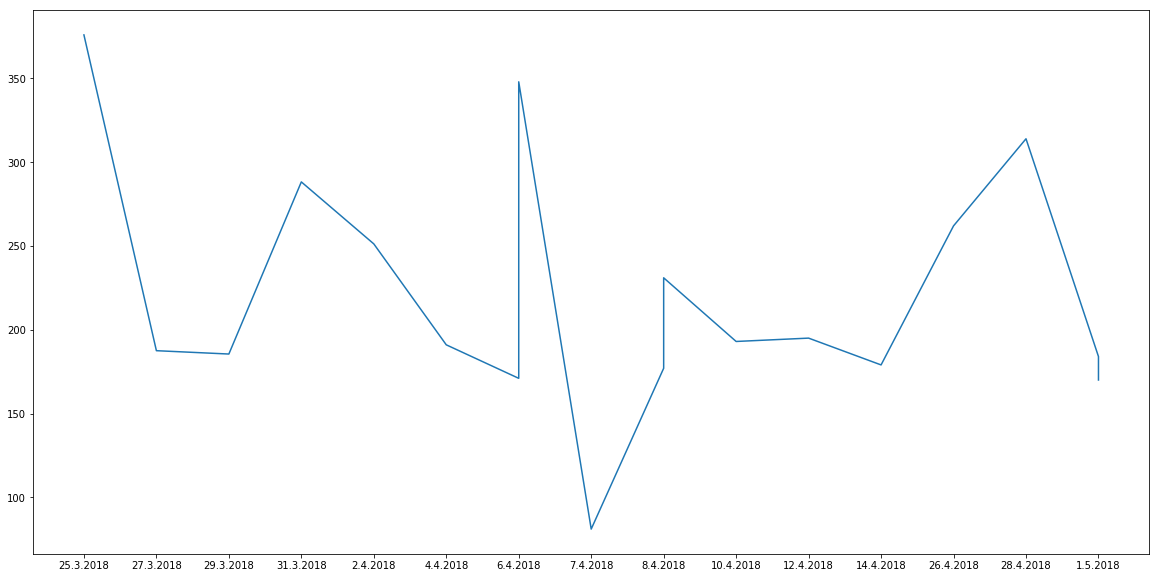

In [102]:
plt.figure(figsize=(20,10))
plt.plot(doripa.date, doripa.scores)
plt.show()

In [99]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['date'], no_arcing['total6'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'phase'

In [ ]:
plt.hist(no_arcing['total'])
plt.show()